In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
from sklearn.linear_model import ElasticNet, LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train_path = '/home/bilalcelebi/Workspace/notebooks/data/regression/train.csv'
test_path = '/home/bilalcelebi/Workspace/notebooks/data/regression/test.csv'

In [4]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
train = train_df.copy()

In [6]:
train.drop('Id', axis = 1, inplace = True)

In [7]:
train_na_cols = train.isna().sum()
train_na_cols = train_na_cols[train_na_cols.values > 0].index.to_list()

In [8]:
train.drop(train_na_cols, axis = 1, inplace = True)

In [9]:
encoder = LabelEncoder()
cat_columns = [column for column in train.columns if train[column].dtype == 'object']

for col in cat_columns:
    train[col] = encoder.fit_transform(train[col])

In [10]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=125, test_size=0.3, shuffle=True)

In [12]:
models_data = dict()
models = {
    'LinearRegression':LinearRegression(),
    'LogisticRegression':LogisticRegression(),
    'ElasticNet':ElasticNet(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'ExtraTreeRegressor':ExtraTreeRegressor()
}

In [13]:
def get_model(x_train,y_train,x_test,y_test, model_name):
    
    model = models[model_name]
    model.fit(x_train,y_train)
    
    preds = model.predict(x_test)
    
    mse = mean_squared_error(preds, y_test)
    mse = np.sqrt(mse)
    r2 = r2_score(preds, y_test)
    
    scores = {'MSE':mse, 'R2':r2}
    
    return scores

In [14]:
for model_name in models.keys():
    
    models_data[model_name] = get_model(X_train,y_train,X_test,y_test,model_name)

/home/bilalcelebi/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/bilalcelebi/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.446e+11, tolerance: 6.381e+08
  model = cd_fast.enet_coordinate_descent(


In [15]:
models_df = pd.DataFrame(models_data)
models_df

,LinearRegression,LogisticRegression,ElasticNet,Ridge,Lasso,DecisionTreeRegressor,ExtraTreeRegressor
MSE,32764.296168,64102.517632,32899.600504,32783.934758,32763.497764,40095.613071,39727.632981
R2,0.786861,-0.420717,0.759948,0.786470,0.786850,0.783570,0.770993


In [16]:
test_df.drop(train_na_cols, axis = 1, inplace = True)

In [17]:
test_df.drop('Id', axis = 1, inplace = True)

In [18]:
test_df.columns = [column for column in test_df.columns if column in X_train.columns]
test_cat_cols = [column for column in test_df.columns if test_df[column].dtype == 'object']

for column in test_cat_cols:   
    test_df[column] = encoder.fit_transform(test_df[column])

In [19]:
selected = Lasso()
selected.fit(X_train, y_train)

Lasso()

In [20]:
test_df.dropna(inplace = True)

In [21]:
test_preds = selected.predict(test_df)

In [22]:
test_df['SalePrice'] = test_preds.round(1)

In [23]:
test_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,2,11622,1,3,3,0,4,0,12,...,0,0,120,0,0,6,2010,8,4,112104.3
1,20,3,14267,1,0,3,0,0,0,12,...,0,0,0,0,12500,6,2010,8,4,158369.7
2,60,3,13830,1,0,3,0,4,0,8,...,0,0,0,0,0,3,2010,8,4,162236.2
3,60,3,9978,1,0,3,0,4,0,8,...,0,0,0,0,0,6,2010,8,4,196231.2
4,120,3,5005,1,0,1,0,4,0,22,...,0,0,144,0,0,1,2010,8,4,193930.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,1936,1,3,3,0,4,0,10,...,0,0,0,0,0,6,2006,8,4,60239.6
1455,160,4,1894,1,3,3,0,4,0,10,...,0,0,0,0,0,4,2006,8,0,53429.3
1456,20,3,20000,1,3,3,0,4,0,11,...,0,0,0,0,0,9,2006,8,0,157794.7
1457,85,3,10441,1,3,3,0,4,0,11,...,0,0,0,0,700,7,2006,8,4,106011.2


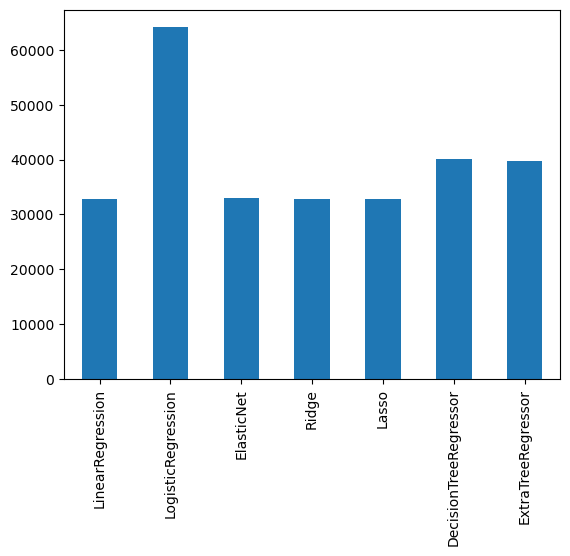

In [61]:
row1 = models_df.iloc[0]
row1.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

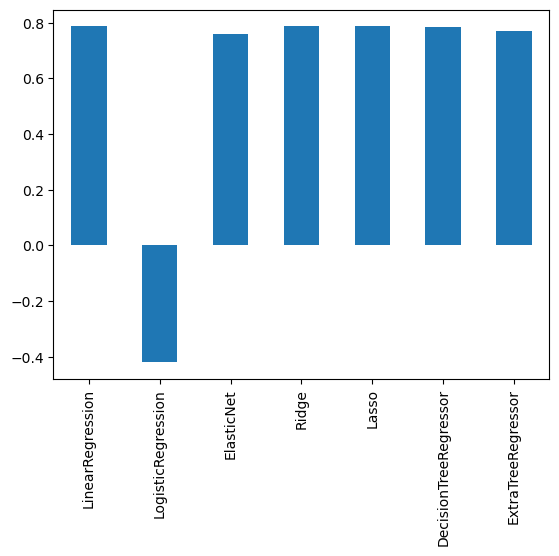

In [62]:
row2 = models_df.iloc[1]
row2.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

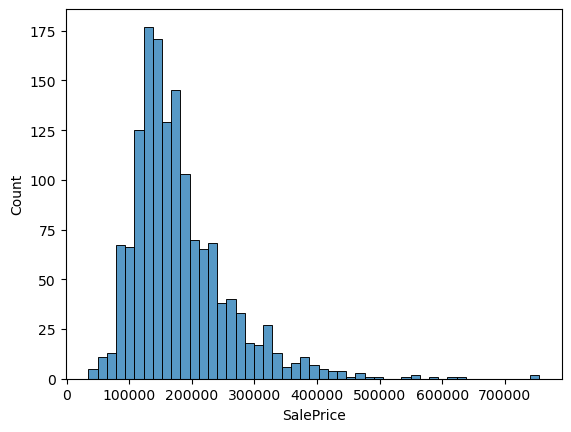

In [33]:
sns.histplot(train_df['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

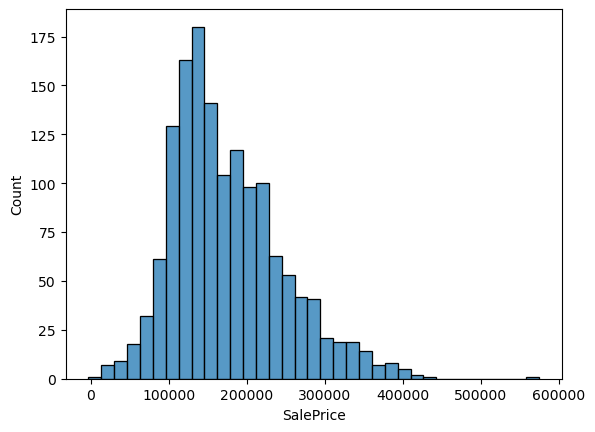

In [34]:
sns.histplot(test_df['SalePrice'])

In [37]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [38]:
test_df['SalePrice'].describe()

count      1456.000000
mean     175147.165385
std       71589.884695
min       -3026.700000
25%      123561.275000
50%      160647.250000
75%      217648.425000
max      575392.400000
Name: SalePrice, dtype: float64

In [64]:
display(test_df.loc[test_df['SalePrice'] < 0])

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
455,30,5,21780,0,3,3,1,4,0,9,2,2,0,2,2,4,1910,1950,1,0,11,13,1,1,1,0.0,0.0,0.0,0.0,0,4,0,810,0,0,810,0.0,0.0,1,0,1,1,3,4,2,0,1.0,280.0,0,119,24,0,0,0,0,0,3,2009,3,4,-3026.7


Normalın çok altında bir veri bu. Bunun haricinde anormal görünen bir prediction görünmemekte. Yukarıdaki grafiklere de bakıldığı zaman test verisi üzerinde predict edilen fiyatlar, eğitim verisi üzerindeki fiyatlarla
hemen hemen uyuşmakta. Tabi bunu doğrulayabilmek adına test verisi ve eğitim verisinin diğer columnları da birbiri
ile uyuşuyor olmalı. 

In [71]:
test_df.loc[test_df['YearBuilt'].isin([test_df.iloc[455]['SalePrice']])]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


1910 yılında inşa edilen tek bina kendisi görünüyor

Bütün modelleri denedim ve inceledim. Skorlar arasında en dengeli model Lasso görünüyor. Bu yüzden test verisini
Lasso üzerinde test etmeye karar verdim.